# Coding Block 3 - Interpretability with SHAP

### Load the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import shap

### Read the dataset 
You can also compare processed and non-processed data.

In [2]:
df = pd.read_csv("../data/diabetes.csv")

### Copy the code from your last successful classifiers (RF, XGBoost, ...)

In [5]:
X = df.drop(columns=["Outcome"])  # Features (all columns except "Outcome")
y = df["Outcome"]  # Target variable (Outcome)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.71


### Create a SHAP summary plot that provides an overview of the average feature importance

<Figure size 640x480 with 0 Axes>

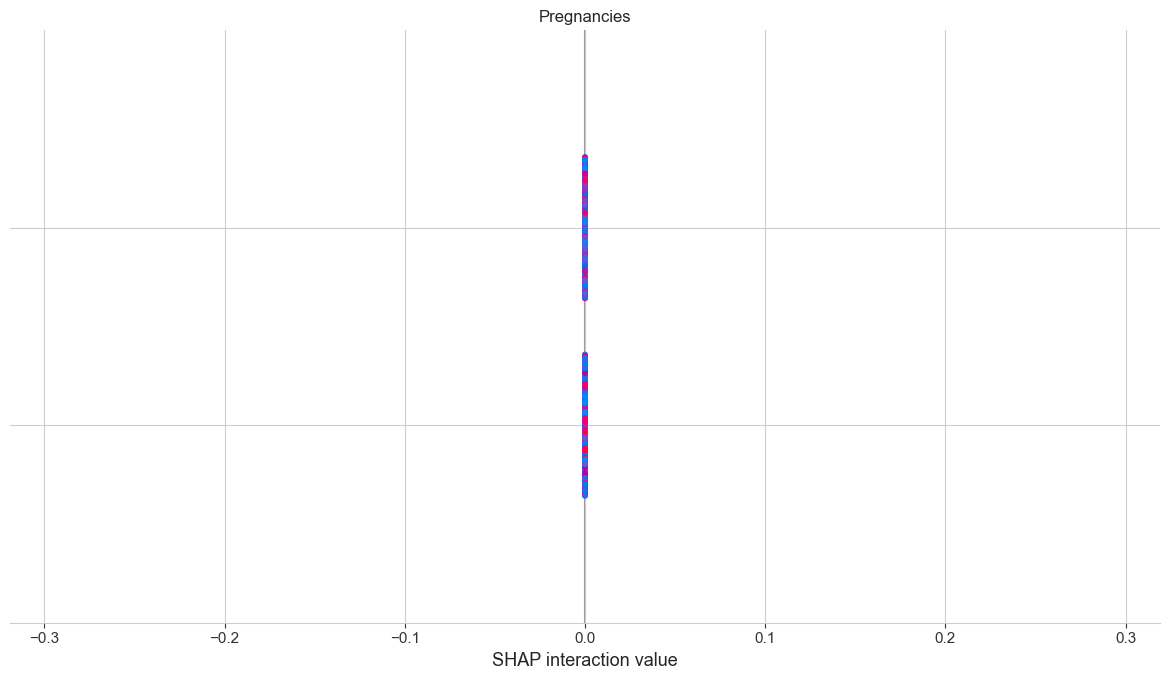

In [6]:
# Create SHAP explainer
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_train)

### Create SHAP waterfall plots that describe the model prediction for one or two individuals from the test dataset